# PHASE 1: DATA ANALYSIS 

In [1]:
# Importing essential libraries for exploration
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Display settings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

In [2]:
#  Load datasets
dataset = pd.read_csv(r"../data/dataset.csv")
Symptom_severity = pd.read_csv(r"../data/Symptom-severity.csv")
symptom_description = pd.read_csv(r"../data/symptom_Description.csv")
symptom_precaution = pd.read_csv(r"../data/symptom_precaution.csv")

dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# shape of dataset
print("Dataset shape (rows, columns):" ,dataset.shape)

# Column names
print("\ncolumns in dataset\n:", dataset.columns)

# Missing values 
print("\n missing values per columns\n:", dataset.isnull().sum())

# Count unique diseases
print("\nlist of unique diseases\n:", dataset["Disease"].nunique())

# List of diseases
print("\nlist of diseases\n:", dataset["Disease"].unique())

Dataset shape (rows, columns): (4920, 18)

columns in dataset
: Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

 missing values per columns
: Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

list of unique diseases
: 41

list of diseases
: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Pa

## Visualization



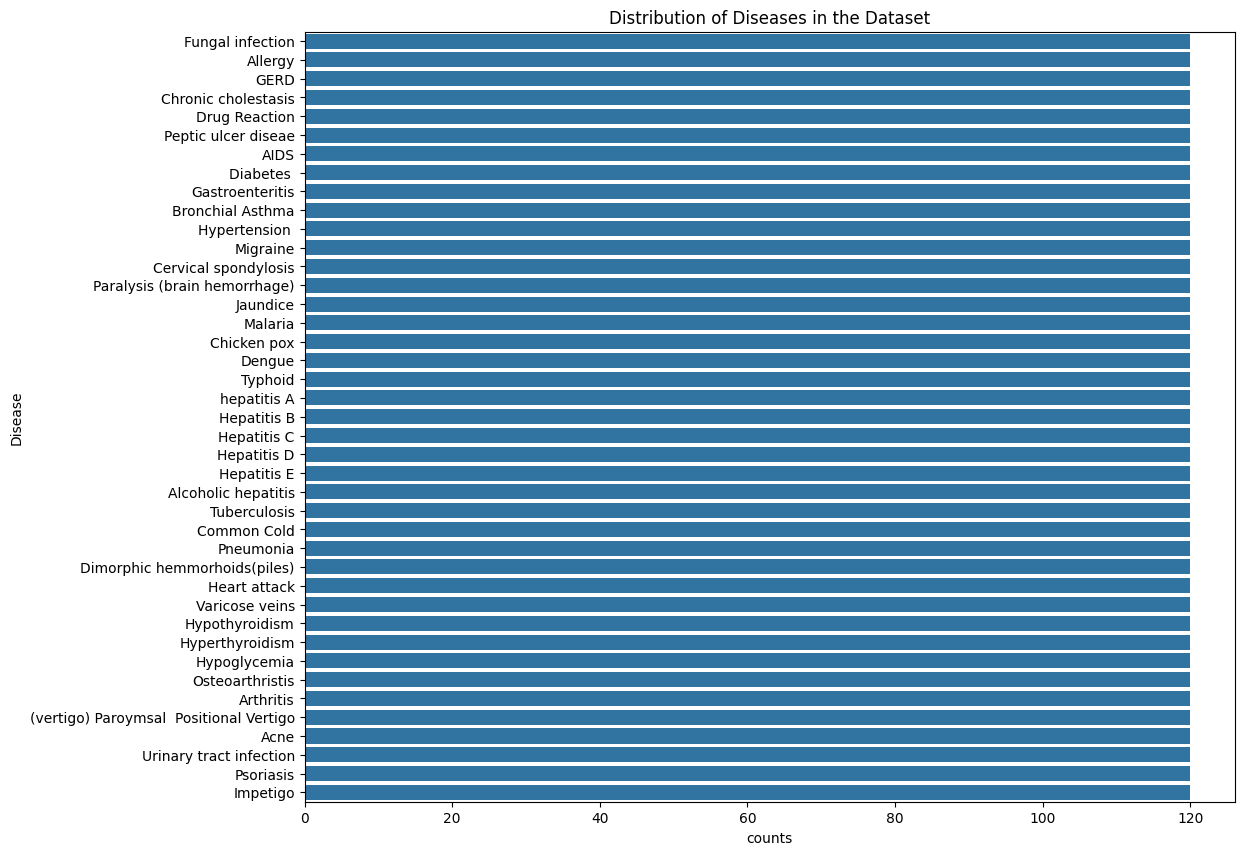

In [4]:
# Visualizing Disease Distribution
# fig size
plt.figure(figsize=(12,10))

sns.countplot(y="Disease" , data=dataset, order=dataset["Disease"].value_counts().index)
plt.title("Distribution of Diseases in the Dataset")
plt.xlabel("counts")
plt.ylabel("Disease")

plt.show()


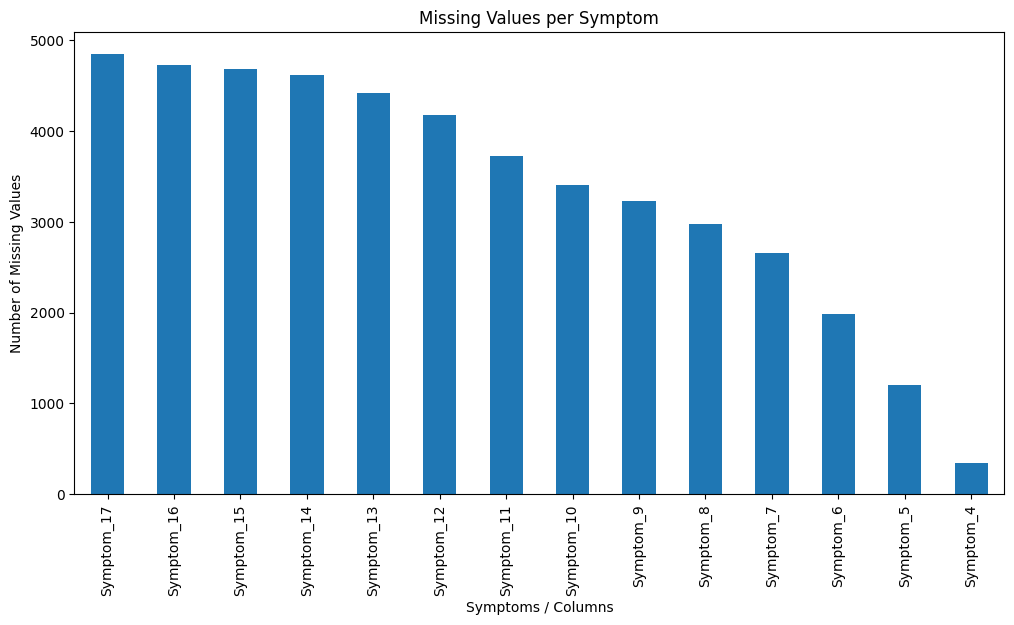

In [5]:
# Visualize missing symptom patterns
missing_counts = dataset.isnull().sum()
plt.figure(figsize=(12,6))
missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar')
plt.title("Missing Values per Symptom")
plt.ylabel("Number of Missing Values")
plt.xlabel("Symptoms / Columns")
plt.show()

## preprocessing and encoding

In [8]:
# Handle Missing Values
dataset.fillna("None", inplace=True)

# Clean disease name
dataset["Disease"] = dataset["Disease"].str.strip()

# Strip spaces from all symptom entries and lowercase
dataset = dataset.apply(lambda col: col.str.strip().str.lower() if col.dtype == "object" else col)


# Separate features and target
X_raw = dataset.drop("Disease", axis=1)
y = dataset["Disease"]

# Create a list of all unique symptoms
symptoms = []
for col in dataset.columns[1:]:
    symptoms.extend(dataset[col].unique())

symptoms = sorted(list(set(symptoms)))  
symptoms.remove("none")                  
print(f"Total Unique Symptoms: {len(symptoms)}")
print("First 20 symptoms:", symptoms[:20])


Total Unique Symptoms: 131
First 20 symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills']


In [9]:
with open("../data/symptom_columns.json", "w") as f:
    json.dump(symptoms, f, indent=4)

print("✅ Clean symptom list saved correctly!")

✅ Clean symptom list saved correctly!


## Encode Symptoms

In [10]:
# Build binary symptom dataframe
df_encoded = pd.DataFrame(0, index=dataset.index, columns=symptoms)

# Fill in 1s where the symptom appears
for i, row in dataset.iterrows():
    for col in dataset.columns[1:]:
        symptom = row[col]
        if symptom != "none":          # lowercase check
            df_encoded.at[i, symptom] = 1

# Add the Disease column at the end
df_encoded["Disease"] = dataset["Disease"]

df_encoded.head()


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,...,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal infection
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal infection
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal infection
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal infection
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal infection


In [11]:
# Verify ML-ready Dataset
print("Ml ready dataset:", df_encoded.shape)
print("Any missing values in dataset:", df_encoded.isnull().sum().sum())

Ml ready dataset: (4920, 132)
Any missing values in dataset: 0


# PHASE 2: MACHINE LEARNING MODEL

In [12]:
# Import Libraries for ML Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
import joblib

In [13]:
# Features and target
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Mapping for reference
disease_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3936, 131)
Testing set shape: (984, 131)


In [14]:
# y_train and y_test are already numeric:
y_train_encoded = y_train
y_test_encoded = y_test

# Disease-label mapping
disease_mapping = dict(zip(le.classes_, le.transform(le.classes_))) 
print("Encoded target sample:", y_train_encoded[:10])
print("\nDisease - label mapping (first 10):")
print(list(disease_mapping.items())[:10])


Encoded target sample: [ 7 19 28  8 31  8 13 32 40 31]

Disease - label mapping (first 10):
[('(vertigo) paroymsal  positional vertigo', np.int64(0)), ('acne', np.int64(1)), ('aids', np.int64(2)), ('alcoholic hepatitis', np.int64(3)), ('allergy', np.int64(4)), ('arthritis', np.int64(5)), ('bronchial asthma', np.int64(6)), ('cervical spondylosis', np.int64(7)), ('chicken pox', np.int64(8)), ('chronic cholestasis', np.int64(9))]


In [15]:
# Assuming you already have 'le' (the LabelEncoder used earlier)
joblib.dump(le, "../models/label_encoder.pkl")
print("✅ Label encoder saved successfully as 'label_encoder.pkl'!")


✅ Label encoder saved successfully as 'label_encoder.pkl'!


## Save the disease label encoder mapping

In [16]:
import json

# Make sure all keys/values are JSON-safe
disease_mapping = {
    str(k): str(v)  # convert everything to string
    for k, v in disease_mapping.items()
}

with open("../data/disease_label_mapping.json", "w") as f:
    json.dump(disease_mapping, f, indent=4)

print("Disease label mapping saved successfully!!!!")
print("Total diseases mapped:", len(disease_mapping))


Disease label mapping saved successfully!!!!
Total diseases mapped: 41


## Decision Tree

Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00     

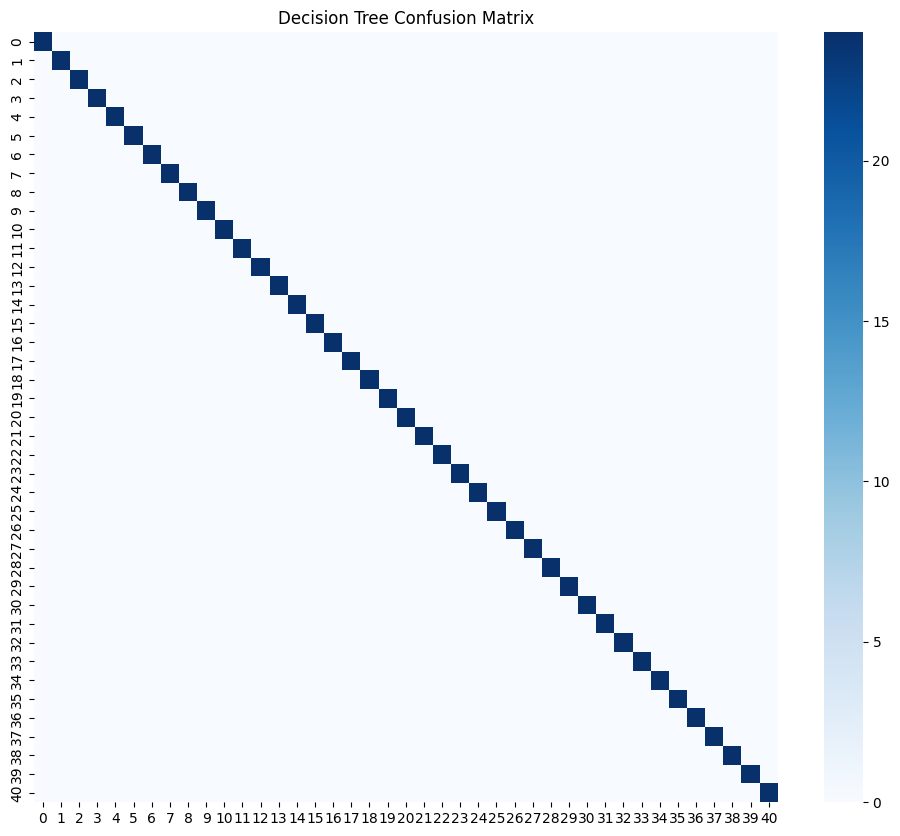

In [17]:
# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train model
dt_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Detailed performance 
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

# Confusion matrix (visualization)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=False, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


## Random Forest

Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00     

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

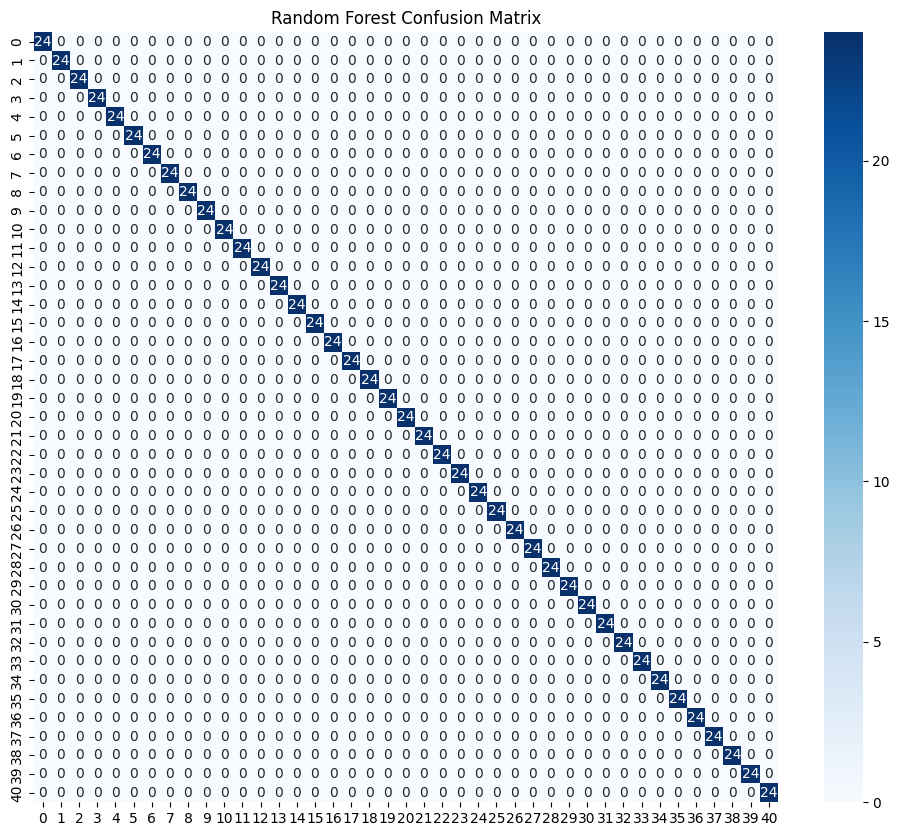

In [18]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

# Train on the training data 
rf_model.fit(X_train, y_train_encoded)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Accuracy 
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Detailed performance
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_rf))

# Confusion matrix (visualization)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")


## Feature Importance Visualization for Random Forest

C:\Users\Gbenga\AppData\Local\Temp\ipykernel_13548\2199398880.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


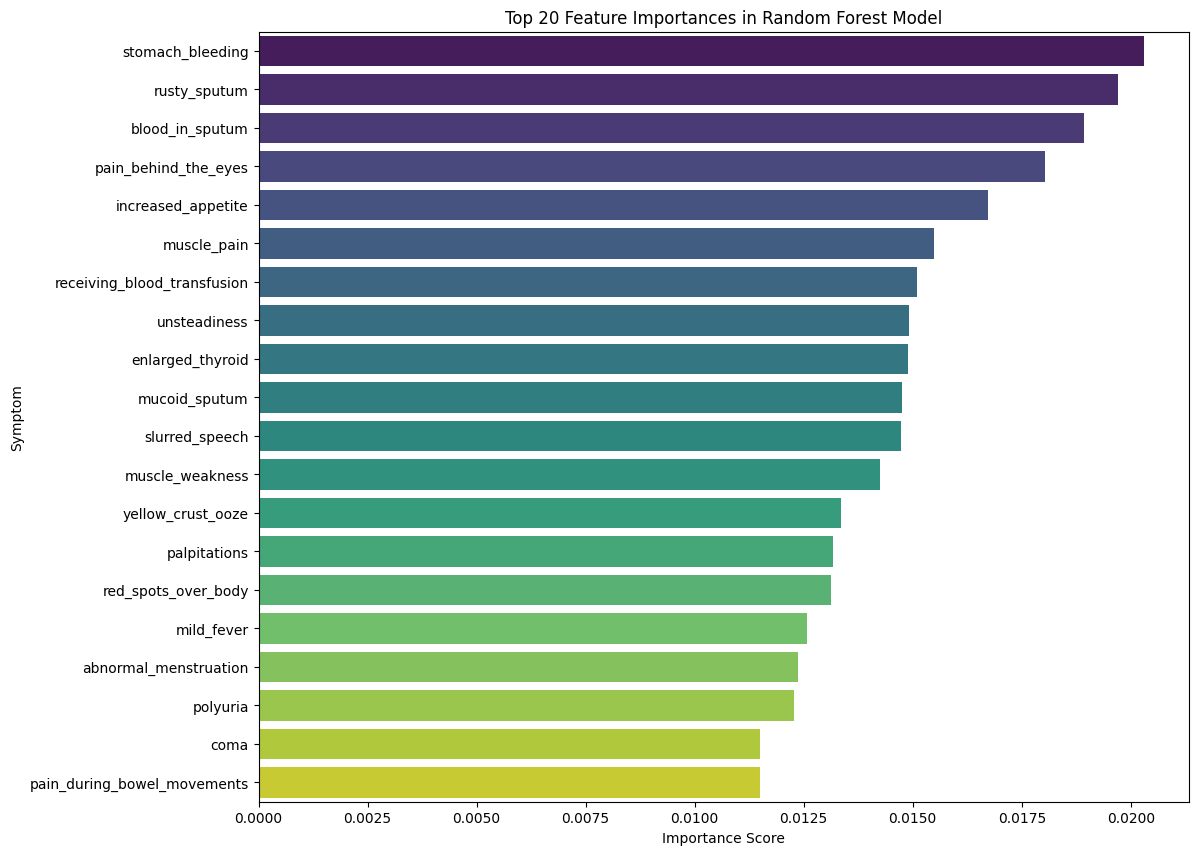

In [19]:
# Get feature importances from the trained Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy plotting
feature_importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance descending
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,10))
sns.barplot(
    x="Importance",
    y="Feature",            # fixed lowercase 'y'
    data=feature_importances_df.head(20),
    palette='viridis'
)

plt.title("Top 20 Feature Importances in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Symptom")
plt.show()


## cumulative feature importance

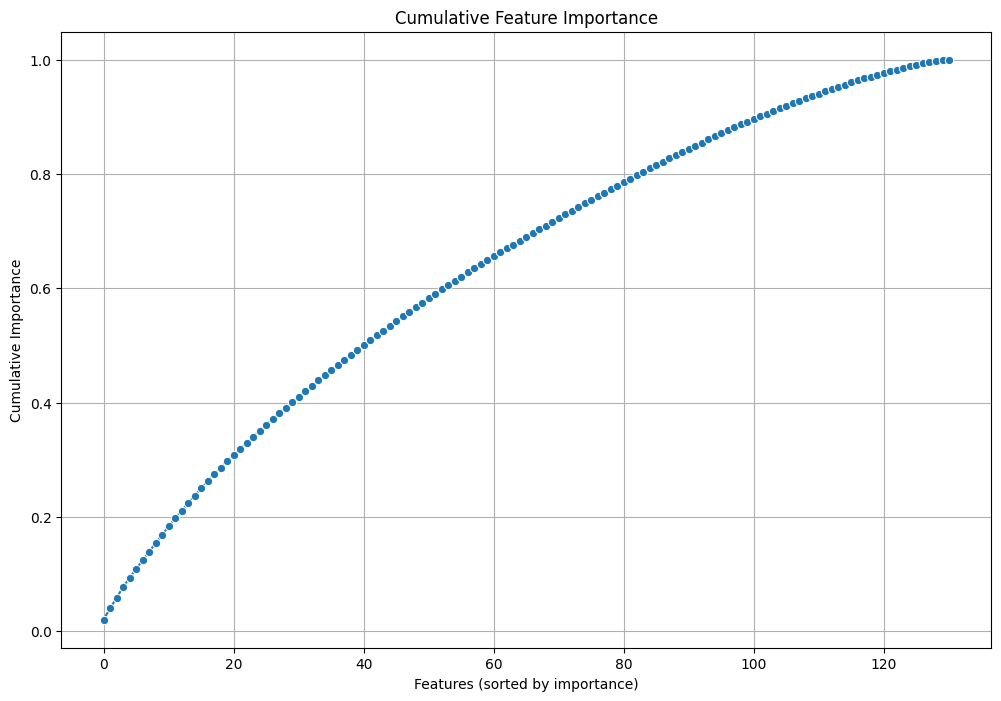

In [20]:
# Sort importances descending
feature_importance_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Compute cumulative importance
feature_importance_sorted['Cumulative'] = feature_importance_sorted['Importance'].cumsum()

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(
    x=range(len(feature_importance_sorted)), 
    y='Cumulative', 
    data=feature_importance_sorted, 
    marker='o'
)
plt.title("Cumulative Feature Importance")
plt.xlabel("Features (sorted by importance)")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()


## Logistic Regression

In [23]:
# Create the model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
print("\nLogistic Regression Accuracy:", accuracy_lr)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_lr))



Logistic Regression Accuracy: 1.0
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
 

## Support Vector Machine (SVM)

In [25]:
# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
print("\nSVM Accuracy:", accuracy_svm)
print("Classification Report (SVM)")
print(classification_report(y_test_encoded, y_pred_svm))



SVM Accuracy: 1.0
Classification Report (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00 

## Naive Bayes

In [26]:
# Create the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)
print("\nNaive Bayes Accuracy:", accuracy_nb)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test_encoded, y_pred_nb))



Naive Bayes Accuracy: 1.0
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16     

In [27]:
# Save Decision Tree
joblib.dump(dt_model, "../models/decision_tree_model.pkl")

# Save Random Forest
joblib.dump(rf_model, "../models/random_forest_model.pkl")

# Save Logistic Regression
joblib.dump(log_reg, "../models/logistic_regression_model.pkl")

# Save SVM
joblib.dump(svm_model, "../models/svm_model.pkl")

# Save Naive Bayes
joblib.dump(nb_model, "../models/naive_bayes_model.pkl")

print("All models saved successfully!")


All models saved successfully!


In [29]:


models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Logistic Regression": log_reg,
    "SVM": svm_model,
    "Naive Bayes": nb_model
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Predict numeric labels
    y_pred = model.predict(X_test)
    
    # Compute metrics using numeric labels
    acc = accuracy_score(y_test_encoded, y_pred)
    mcc = matthews_corrcoef(y_test_encoded, y_pred)
    
    # Log loss only if model supports predict_proba
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)
        ll = log_loss(y_test_encoded, probs)
    else:
        ll = "N/A"
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Log Loss: {ll}")
    print(f"MCC: {mcc:.4f}")




=== Decision Tree ===
Accuracy: 1.0000
Log Loss: 2.220446049250313e-16
MCC: 1.0000

=== Random Forest ===
Accuracy: 1.0000
Log Loss: 1.2282909037687462
MCC: 1.0000

=== Logistic Regression ===
Accuracy: 1.0000
Log Loss: 0.021943991914598063
MCC: 1.0000

=== SVM ===
Accuracy: 1.0000
Log Loss: N/A
MCC: 1.0000

=== Naive Bayes ===
Accuracy: 1.0000
Log Loss: 2.220446049250313e-16
MCC: 1.0000


In [30]:
results = {
    "Decision Tree": {"Accuracy": 1.0000, "Log Loss": 2.22e-16, "MCC": 1.0000},
    "Random Forest": {"Accuracy": 1.0000, "Log Loss": 1.2471, "MCC": 1.0000},
    "Logistic Regression": {"Accuracy": 1.0000, "Log Loss": 0.0227, "MCC": 1.0000},
    "SVM": {"Accuracy": 1.0000, "Log Loss": "N/A", "MCC": 1.0000},
    "Naive Bayes": {"Accuracy": 1.0000, "Log Loss": 2.22e-16, "MCC": 1.0000}
}

import json
with open("../results/model_metrics.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ Model evaluation metrics saved successfully!")


✅ Model evaluation metrics saved successfully!
